In [24]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn import tree

pd.set_option('display.max_columns', 50)

In [124]:
df = pd.read_csv("18-19-bax_to_win_data.csv")
df

,Unnamed: 0.1,Unnamed: 0,GAME_ID,PTS_x,FG_PCT_x,FT_PCT_x,FG3_PCT_x,AST_x,REB_x,TOV_x,PTS_y,FG_PCT_y,FT_PCT_y,FG3_PCT_y,AST_y,REB_y,TOV_y,OT_x,Games_in_2_x,Games_in_5_x,Games_in_7_x,Games_in_2_y,Games_in_5_y,Games_in_7_y,Home_Distance,Away_Distance,Dist_in_2_x,Dist_in_5_x,Dist_in_7_x,Dist_in_2_y,Dist_in_5_y,Dist_in_7_y,Home_Win,Home_Wins,Home_Losses,Away_Wins,Away_Losses,Home_Win%,Away_Win%,Win_Perc_Diff,baxter_home,baxter_away
0,0,0,21800001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,False,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,True,1,0,0,1,1.000000,0.000000,1.000000,False,False
1,1,1,21800002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,False,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,True,1,0,0,1,1.000000,0.000000,1.000000,False,False
2,2,2,21800003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,False,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,False,0,1,1,0,0.000000,1.000000,-1.000000,False,False
3,3,3,21800004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,False,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,True,1,0,0,1,1.000000,0.000000,1.000000,False,False
4,4,4,21800005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,False,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,True,1,0,0,1,1.000000,0.000000,1.000000,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,1225,1225,21801226,109.481481,0.477580,0.802852,0.357593,22.679012,41.987654,11.790123,110.049383,0.470519,0.772938,0.366728,25.185185,44.481481,14.358025,False,0,2,3,1,2,3,0.000000,1179.275404,0.000000,1116.887139,1250.581409,2296.868117,3414.460829,3414.460829,False,60,22,49,33,0.731707,0.597561,0.134146,False,False
1226,1226,1226,21801227,111.592593,0.483012,0.775469,0.360630,26.728395,44.259259,14.358025,102.790123,0.458444,0.777309,0.352494,22.790123,44.296296,12.629630,False,0,1,2,1,2,3,2019.362731,404.939354,2019.362731,2509.915869,4910.098187,1080.811386,1756.683418,1756.683418,True,48,34,33,49,0.585366,0.402439,0.182927,False,False
1227,1227,1227,21801228,107.493827,0.451988,0.714593,0.350753,21.209877,45.061728,13.432099,99.037037,0.443765,0.780432,0.350148,21.543210,40.518519,14.432099,False,1,2,3,1,2,3,595.877137,1124.440778,1616.305585,3193.548170,3193.548170,1124.440778,1124.440778,2513.931232,True,54,28,36,46,0.658537,0.439024,0.219512,False,False
1228,1228,1228,21801229,109.098765,0.472704,0.743148,0.351383,22.283951,43.925926,14.037037,107.987654,0.460691,0.716519,0.338790,23.753086,46.345679,15.296296,True,0,1,2,1,2,3,543.758097,935.332592,543.758097,1087.516194,1087.516194,1870.665185,2805.997777,3620.617762,True,48,34,50,32,0.585366,0.609756,-0.024390,False,False


In [125]:
df_model = df.drop(columns =['Unnamed: 0.1','Unnamed: 0','Home_Wins','Away_Wins','Home_Losses', 'Away_Losses'], axis = 1)

In [126]:
X = df_model.drop(columns = ["Home_Win"])
y = df_model["Home_Win"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [127]:
def dec_tree_train(X_train, X_test, y_train, y_test):

  clf_model = DecisionTreeClassifier()

  clf_model = clf_model.fit(X_train, y_train)

  return clf_model

Accuracy: 0.6233062330623306


Accuracy: 0.6910569105691057


0          0.000000
1          0.000000
2          0.000000
3          0.000000
4          0.000000
           ...     
1225    3414.460829
1226    1756.683418
1227    2513.931232
1228    3620.617762
1229    2482.345257
Name: Dist_in_7_y, Length: 1230, dtype: float64

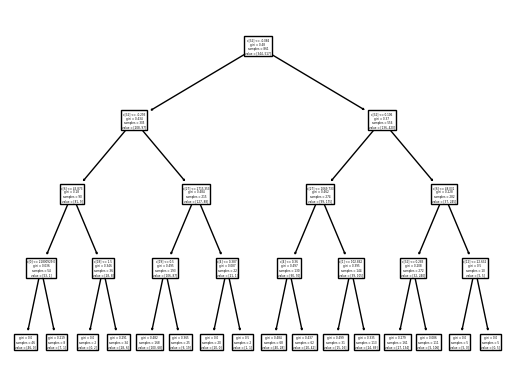

In [128]:
def dec_tree_train_depth(X_train, X_test, y_train, y_test, depth, crit):

  clf_prun = DecisionTreeClassifier(criterion = crit, max_depth = depth)

  clf_prun = clf_prun.fit(X_train, y_train)

  return clf_prun

In [ ]:
def tree_train_bag(X_train, X_test, y_train, y_test)
  bag_model = BaggingClassifier()
  bag_model = bag_model.fit(X_train, y_train)
  return bag_model

def tree_model_predict(model, X_test):
  y_pred = model.predict(X_test)

  return y_pred, model

In [ ]:
def tree_viz(model):
  tree_plot = tree.plot_tree(model)
  return tree_plot

def tree_acc(y_test, y_pred):
  return metrics.accuracy_score(y_test, y_pred)